In [50]:
import os
import pandas as pd 
import librosa
import numpy as np
import matplotlib.pyplot as plt
import torch 
from IPython.display import Audio

import nibabel as nib
from nilearn import plotting
from nilearn.glm.first_level import FirstLevelModel
from nilearn.plotting import plot_design_matrix
from nilearn.plotting import plot_contrast_matrix

# Exploring Wav

In [51]:
fmri_music_path = '/data01/data/fMRI_music_genre'
print(os.listdir(fmri_music_path))
stimuli_path = fmri_music_path + '/data_wav'
print(os.listdir(stimuli_path))

['data_wav', 'ds003720']
['brain2music-captions.csv', 'genres_original', '.DS_Store', 'features_30_sec.csv', 'images_original', 'features_3_sec.csv']


In [52]:
csv_captions_path = stimuli_path + '/brain2music-captions.csv'
df = pd.read_csv(csv_captions_path)
print(df.head())

                ID                                             DescEN
0  blues.00000_15s  Heavy blues with male vocals. Simple cutting w...
1  blues.00002_15s  Rhythmic blues. Obligatory trumpet obbligato a...
2  blues.00005_15s  Slow blues musical piece. Sentimental atmosphe...
3  blues.00006_15s  This blues is played with twin guitars only. T...
4  blues.00010_15s  This is an instrumental piece with electric gu...


In [53]:
csv_feature_path = stimuli_path + '/features_30_sec.csv'
df = pd.read_csv(csv_feature_path)
column_names = df.columns
print(column_names.tolist())

['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']


In [54]:
wav_path = stimuli_path + '/genres_original'
print(os.listdir(wav_path))
metal_path = wav_path + '/metal'
print(os.listdir(metal_path))


['pop', '.DS_Store', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']
['metal.00022.wav', 'metal.00036.wav', 'metal.00037.wav', 'metal.00023.wav', 'metal.00009.wav', 'metal.00035.wav', 'metal.00021.wav', 'metal.00020.wav', 'metal.00034.wav', 'metal.00008.wav', 'metal.00030.wav', 'metal.00024.wav', 'metal.00018.wav', 'metal.00019.wav', 'metal.00025.wav', 'metal.00031.wav', 'metal.00027.wav', 'metal.00033.wav', 'metal.00032.wav', 'metal.00026.wav', 'metal.00082.wav', 'metal.00096.wav', 'metal.00069.wav', 'metal.00041.wav', 'metal.00055.wav', 'metal.00054.wav', 'metal.00040.wav', 'metal.00068.wav', 'metal.00097.wav', 'metal.00083.wav', 'metal.00095.wav', 'metal.00081.wav', 'metal.00056.wav', 'metal.00042.wav', 'metal.00043.wav', 'metal.00057.wav', 'metal.00080.wav', 'metal.00094.wav', 'metal.00090.wav', 'metal.00084.wav', 'metal.00053.wav', 'metal.00047.wav', 'metal.00046.wav', 'metal.00052.wav', 'metal.00085.wav', 'metal.00091.wav', 'metal.00087.wav'

In [55]:
audio_metal = metal_path + '/metal.00022.wav'
Audio(audio_metal)


In [56]:
audio_oth = wav_path + '/classical' + '/classical.00011.wav'
Audio(audio_oth)

Sampling Rate:  22050


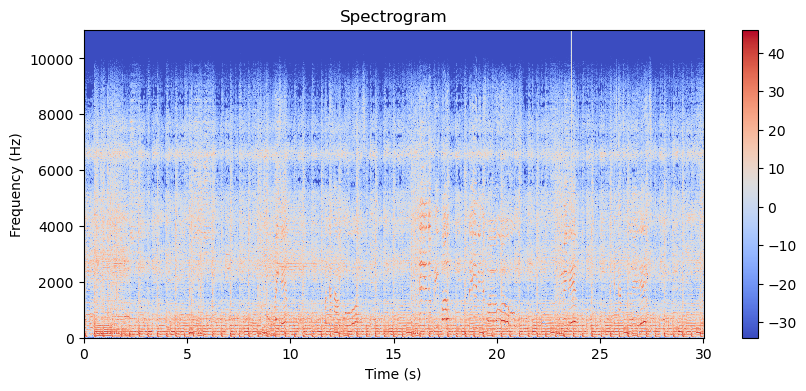

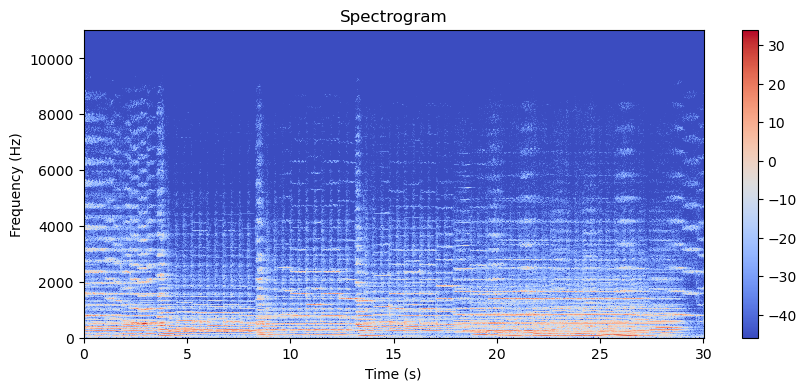

In [57]:
signal_metal, sr = librosa.load(audio_metal)
signal_other, sr = librosa.load(audio_oth)
print("Sampling Rate: ", sr)

X_met = librosa.stft(signal_metal)
Xdb_met = librosa.amplitude_to_db(abs(X_met))
X_oth = librosa.stft(signal_other)
Xdb_oth = librosa.amplitude_to_db(abs(X_oth))

plt.figure(figsize=(10, 4))
librosa.display.specshow(Xdb_met, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(Xdb_oth, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

# Exploring fMRI

In [58]:
neural_path = fmri_music_path + '/ds003720/sub-001'
print(os.listdir(neural_path))
event_path = neural_path + '/func/sub-001_task-Test_run-01_events.tsv'

['anat', 'func']


In [59]:
pd.read_csv(event_path, sep='\t')

onset  duration        genre  track  start    end
0       0        15        'pop'     32  10.70  25.70
1      15        15       'rock'     32   4.48  19.48
2      30        15    'country'     85   1.07  16.07
3      45        15      'blues'     17   6.44  21.44
4      60        15      'disco'     75  11.03  26.03
5      75        15      'metal'     39  13.11  28.11
6      90        15     'reggae'     33  12.55  27.55
7     105        15  'classical'     45   8.35  23.35
8     120        15     'hiphop'     95   8.59  23.59
9     135        15       'jazz'     44   9.49  24.49
10    150        15        'pop'     32  10.70  25.70
11    165        15       'rock'     32   4.48  19.48
12    180        15    'country'     85   1.07  16.07
13    195        15      'blues'     17   6.44  21.44
14    210        15      'disco'     75  11.03  26.03
15    225        15      'metal'     39  13.11  28.11
16    240        15     'reggae'     33  12.55  27.55
17    255        15  'classical'     45   8.35  23.35
18    270        15     'hiphop'     95   8.59  23.59
19    285        15       'jazz'     44   9.49  24.49
20    300        15        'pop'     32  10.70  25.70
21    315        15       'rock'     32   4.48  19.48
22    330        15    'country'     85   1.07  16.07
23    345        15      'blues'     17   6.44  21.44
24    360        15      'disco'     75  11.03  26.03
25    375        15      'metal'     39  13.11  28.11
26    390        15     'reggae'     33  12.55  27.55
27    405        15  'classical'     45   8.35  23.35
28    420        15     'hiphop'     95   8.59  23.59
29    435        15       'jazz'     44   9.49  24.49
30    450        15        'pop'     32  10.70  25.70
31    465        15       'rock'     32   4.48  19.48
32    480        15    'country'     85   1.07  16.07
33    495        15      'blues'     17   6.44  21.44
34    510        15      'disco'     75  11.03  26.03
35    525        15      'metal'     39  13.11  28.11
36    540        15     'reggae'     33  12.55  27.55
37    555        15  'classical'     45   8.35  23.35
38    570        15     'hiphop'     95   8.59  23.59
39    585        15       'jazz'     44   9.49  24.49
40    600        15        'pop'     32  10.70  25.70

In [60]:
fmri_data = nib.load(event_path.replace('events.tsv', 'bold.nii'))

In [61]:
print(fmri_data)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (96, 96, 68, 410)
affine:
[[-1.99697757e+00  9.76685435e-02  5.04113697e-02  9.09995117e+01]
 [ 9.47604254e-02  1.99468148e+00 -1.10752434e-01 -7.82326355e+01]
 [ 5.56858294e-02  1.08196564e-01  1.99629462e+00 -4.51147003e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 57
dim             : [  4  96  96  68 410   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.   2.   2.   2.   1.5  0.   0.   0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 

In [62]:
fmri_data.get_fdata().shape

(96, 96, 68, 410)

## 10 Genres

### FLM & Design Matrix

In [128]:
events_df = pd.read_csv(event_path, sep='\t')
fmri_img = nib.load(event_path.replace('events.tsv', 'bold.nii'))
t_r = 1.5

events_df['trial_type'] = events_df['genre']
first_level_model = FirstLevelModel(t_r)
first_level_model = first_level_model.fit(fmri_img, events=events_df)
design_matrix = first_level_model.design_matrices_[0]



/home/matteoc/miniconda3/envs/speech-meg/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: track, genre, end, start
  warnings.warn(


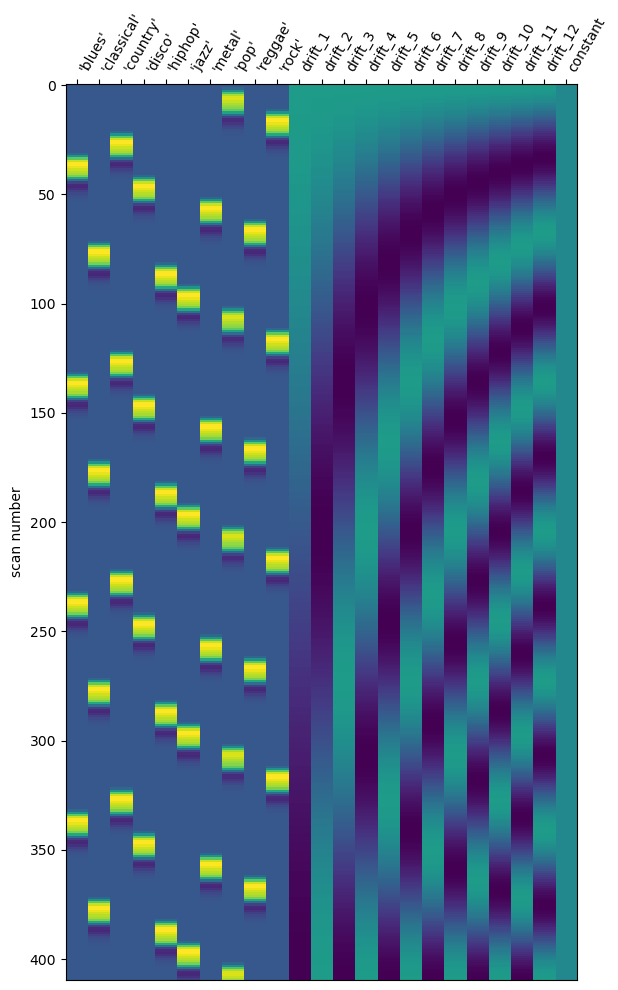

In [129]:
plot_design_matrix(design_matrix)
plt.show()

### Examples of genre contrasts

In [130]:
def make_genre_contrasts(design_matrix):
    """Return a dictionary of contrasts for musical genres, given the design matrix."""
    # Generate canonical contrasts for each genre
    contrast_matrix = np.eye(design_matrix.shape[1])
    contrasts = {
        column: contrast_matrix[i]
        for i, column in enumerate(design_matrix.columns)
    }

    # Example individual contrasts
    contrasts["classical_vs_metal"] = contrasts["'classical'"] - contrasts["'metal'"]
    contrasts["classical_vs_jazz"] = contrasts["'classical'"] - contrasts["'jazz'"]

    # Group contrasts
    modern_genres = ["'pop'", "'hiphop'", "'metal'", "'disco'"]
    classical_genres = ["'classical'", "'jazz'", "'blues'", "'country'"]
    
    contrasts["modern_vs_classical"] = sum(contrasts[genre] for genre in modern_genres) - sum(contrasts[genre] for genre in classical_genres)
    
    # Contrast combining all genres for a general musical stimulation effect
    all_genres_no_class = ["'pop'", "'metal'", "'disco'", "'blues'", "'reggae'", "'rock'", "'hiphop'", "'country'", "'jazz'"]
    contrasts["all_genres_no_class"] = sum(contrasts[genre] for genre in all_genres_no_class) - contrasts["'classical'"]

    contrasts = {
        "classical - metal": (
            contrasts["classical_vs_metal"]
        ),
        "classical - jazz": contrasts["classical_vs_jazz"],
        "modern genres - classical genres": (
            contrasts["modern_vs_classical"]
        ),
        "all genres - classical": (
            contrasts["all_genres_no_class"]
        ),
    }
    
    return contrasts




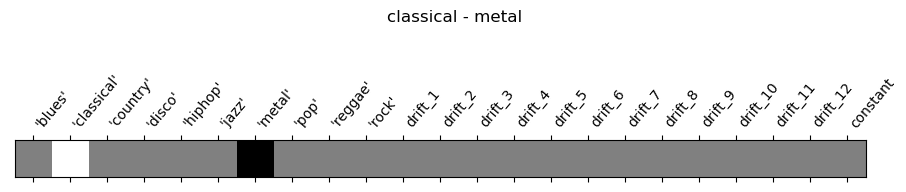

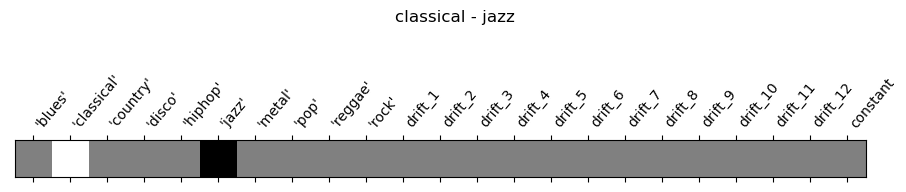

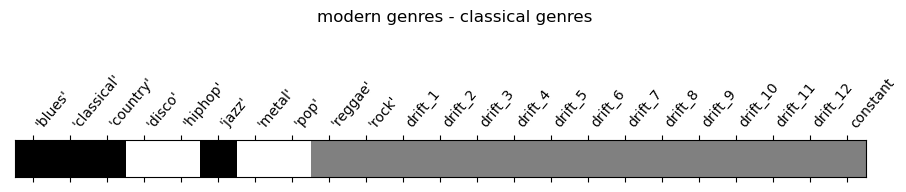

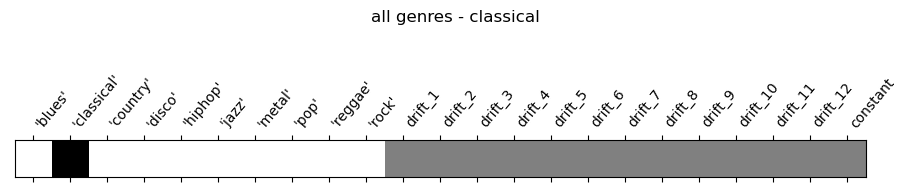

In [131]:
contrasts = make_genre_contrasts(design_matrix)

for key, values in contrasts.items():
    plot_contrast_matrix(values, design_matrix=design_matrix)
    plt.suptitle(key)

plt.show()

In [132]:
def plot_contrast(first_level_model):
    """Specify, estimate and plot the main contrasts \
        for given a first model."""
    design_matrix = first_level_model.design_matrices_[0]
    # Call the contrast specification within the function
    contrasts = make_genre_contrasts(design_matrix)
    plt.figure(figsize=(20, 4))
    # compute the per-contrast z-map
    for index, (contrast_id, contrast_val) in enumerate(contrasts.items()):
        ax = plt.subplot(1, len(contrasts), 1+index)
        eff_map = first_level_model.compute_contrast(
            contrast_val, output_type="effect_size"
        )
        plotting.plot_stat_map(
            eff_map,
            display_mode="z",
            threshold=3.0,
            vmax=30,
            vmin=-30,
            title=contrast_id,
            axes=ax,
            cut_coords=(1),   
        )

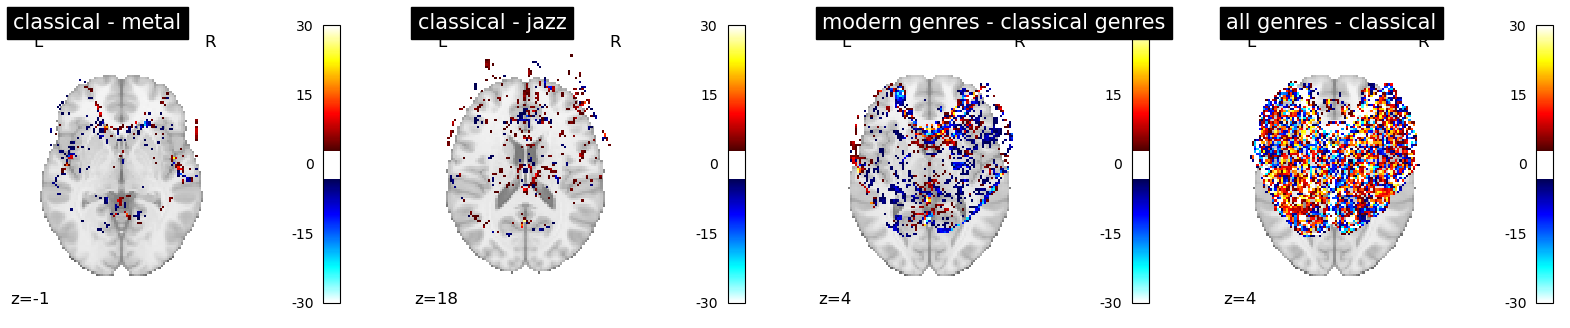

In [133]:
plot_contrast(first_level_model)
plt.show()

### Across genres

(96, 96, 68)


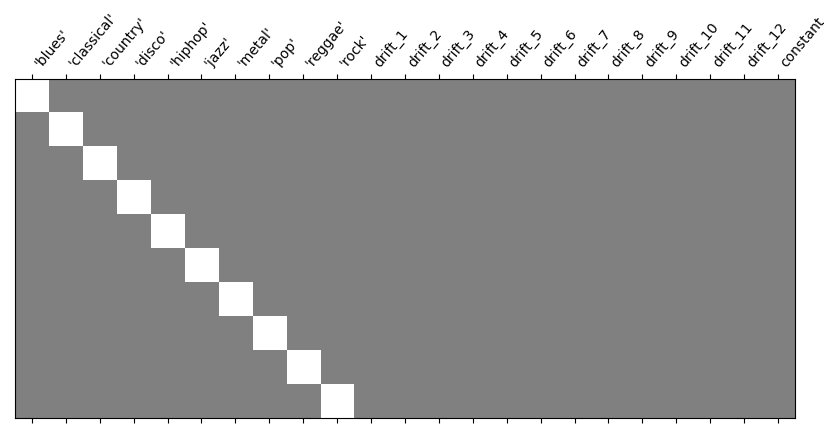

In [134]:
contrast_val = np.eye(design_matrix.shape[1])[0:-13]
# contrast_val[:,-1] = -1
plot_contrast_matrix(contrast_val, design_matrix)

z_map = first_level_model.compute_contrast(contrast_val, output_type="z_score")
eff_map = first_level_model.compute_contrast(contrast_val, output_type="effect_size")
print(z_map.shape)


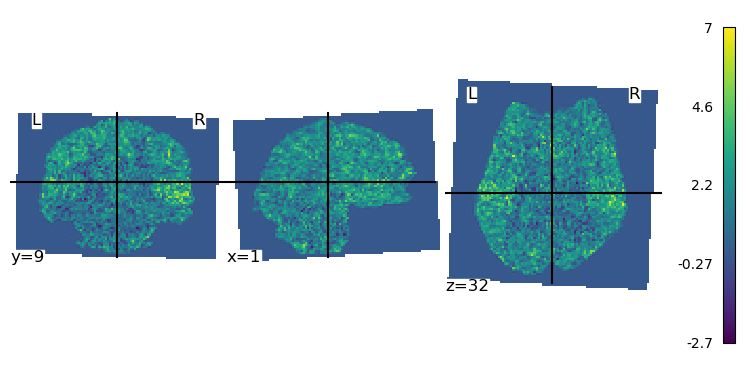

In [135]:
plotting.plot_img(z_map,colorbar=True,threshold=0)

In [136]:
imgs=[]
data=eff_map.get_fdata()
print(data.shape)
for i in range(design_matrix.shape[1]-13):
    img_data=data[:,:,:,i]
    img_nii=nib.Nifti1Image(img_data,affine=z_map.affine)
    imgs.append(img_nii)

(96, 96, 68, 10)


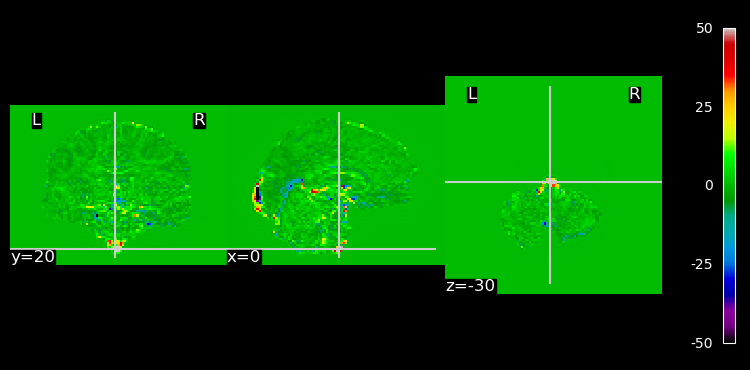

In [137]:
plotting.plot_epi(imgs[4],vmax=50,vmin=-50,colorbar=True,cut_coords=(0,20,-30))